EJERCICIO 2, por favor noten en principio que estamos lidiando con un campo vectorial caracteristico dado por los coeficientes de la ecuacion como sigue, 

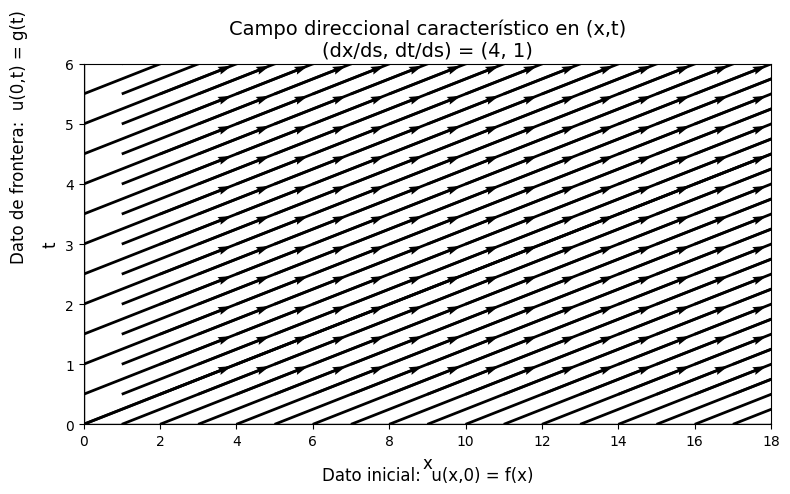

In [ ]:


import numpy as np
import matplotlib.pyplot as plt

# limites del plano
x_max, t_max = 18, 6

# crear grilla de puntos
nx, nt = 19, 13
x = np.linspace(0, x_max, nx)
t = np.linspace(0, t_max, nt)
X, T = np.meshgrid(x, t)

# campo vectorial caracteristico normalizado
U = np.ones_like(X) * 4.0
V = np.ones_like(T) * 1.0
norm = np.sqrt(U**2 + V**2)
U_n = U / norm
V_n = V / norm

# figura
fig, ax = plt.subplots(figsize=(8, 5))
ax.quiver(X, T, U_n, V_n, angles='xy', scale_units='xy', scale=0.25, width=0.004, color='k')
ax.set_title("Campo direccional característico en (x,t)\n(dx/ds, dt/ds) = (4, 1)", fontsize=14)
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("t", fontsize=12)
ax.set_xlim(0, x_max)
ax.set_ylim(0, t_max)

# dibujar ejes
ax.plot([0, x_max], [0, 0], color='k', linewidth=1)
ax.plot([0, 0], [0, t_max], color='k', linewidth=1)

# dibujar separatriz x=4t en negro
t_line = np.linspace(0, t_max, 400)
x_sep = 4 * t_line
mask = x_sep <= x_max
ax.plot(x_sep[mask], t_line[mask], color='k', linewidth=2)

# etiquetas lejos de los ejes
ax.annotate("Dato de frontera:  u(0,t) = g(t)",
            xy=(0, t_max*0.8), xytext=(-40, 0), textcoords='offset points',
            ha='right', va='center', rotation=90, fontsize=12)

ax.annotate("Dato inicial:  u(x,0) = f(x)",
            xy=(x_max*0.5, 0), xytext=(0, -30), textcoords='offset points',
            ha='center', va='top', fontsize=12)

fig.tight_layout()
plt.savefig("campo_caracteristico_adjusted.png", dpi=500)
plt.show()


Al aplicar la heuristica del metodo de las caracteristicas buscamos curvas bajo las cuales nuestra solucion u se mantenga constante bajo la accion de este campo caracteristico, esto eventualemente nos lleva a convertir la PDE en una ODE, lo cual nos lleva a deducir las curvas caracteristicas asociadas a la PDE del ejercicio. las cuales se ven como en la siguiente imagen, esto les toca calcular explicitamente, no se metan a ver el codigo. (ಠ_ಠ)

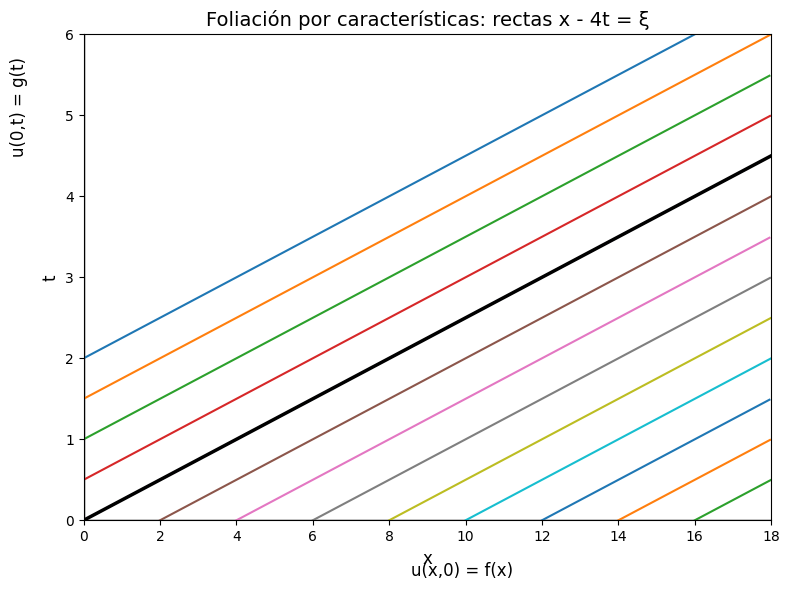

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# limites del plano
x_max, t_max = 18, 6

# figura
fig2, ax2 = plt.subplots(figsize=(8, 6))

# ejes
ax2.plot([0, x_max], [0, 0], color='k', linewidth=1)
ax2.plot([0, 0], [0, t_max], color='k', linewidth=1)

# dibujar muchas caracteristicas
xis = np.arange(-8, 19, 2)
t_vals = np.linspace(0, t_max, 400)
for xi in xis:
    x_vals = 4*t_vals + xi
    mask = (x_vals >= 0) & (x_vals <= x_max)
    if np.any(mask):
        ax2.plot(x_vals[mask], t_vals[mask], linewidth=1.5)

# separatriz x=4t mas gruesa
x_sep = 4 * t_vals
mask = x_sep <= x_max
ax2.plot(x_sep[mask], t_vals[mask], color='k', linewidth=2.5)

# etiquetas de datos
ax2.annotate("u(0,t) = g(t)",
             xy=(0, t_max*0.85), xytext=(-40, 0), textcoords='offset points',
             ha='right', va='center', rotation=90, fontsize=12)

ax2.annotate("u(x,0) = f(x)",
             xy=(x_max*0.55, 0), xytext=(0, -30), textcoords='offset points',
             ha='center', va='top', fontsize=12)

ax2.set_title("Foliación por características: rectas x - 4t = ξ", fontsize=14)
ax2.set_xlabel("x", fontsize=12)
ax2.set_ylabel("t", fontsize=12)
ax2.set_xlim(0, x_max)
ax2.set_ylim(0, t_max)

fig2.tight_layout()
plt.savefig("foliacion_caracteristicas_adjusted.png", dpi=150)
plt.show()


Estas curvas, que en este problema en particular son rectas, **folian el espacio tiempo**. Si seguimos el campo caracteristico, vemos que la **solucion es constante a lo largo de cada caracteristica**. Recuerden el ejemplo de la primera ayudantia!  

Este ejercicio es mas rico porque **no solo tenemos un perfil inicial** g(x) en t=0, sino tambien **una condicion de frontera** f(t) en x=0. Hay que tener cuidado:  
- Este tipo de ecuaciones tiene una **propagacion con velocidad finita**, dada por el coeficiente del termino ut.  
- Esto crea un **area de influencia** para cada punto en el plano (x,t).  
- Por eso **no todos los puntos pueden verse influidos por ambas condiciones**. Hay una recta separatriz que pasa por el origen que divide claramente las dos regiones.  

Para cada punto, si seguimos **su caracteristica hacia atras en el tiempo**, podemos ver de donde viene la info que define u(x,t):  
- De la **condicion inicial** en t=0, o  
- De la **condicion de frontera** en x=0.  

En cada caso, como la ecuacion diferencial en el sistema caracteristico es sencilla (du/ds=0), la **solucion se da directo en terminos del dato que le toca**.  

En los gifs de abajo esto se ve clarisimo:  
- Un punto retrocede hasta el eje t=0, mostrando que su valor viene del perfil inicial.  
- Otro punto llega al eje x=0, mostrando que su valor viene de la condicion de frontera.  

Este ejemplo muestra super bien como la **procedencia de la informacion cambia la forma de la solucion** y como funcionan las areas de influencia en edp hiperbolicas.  


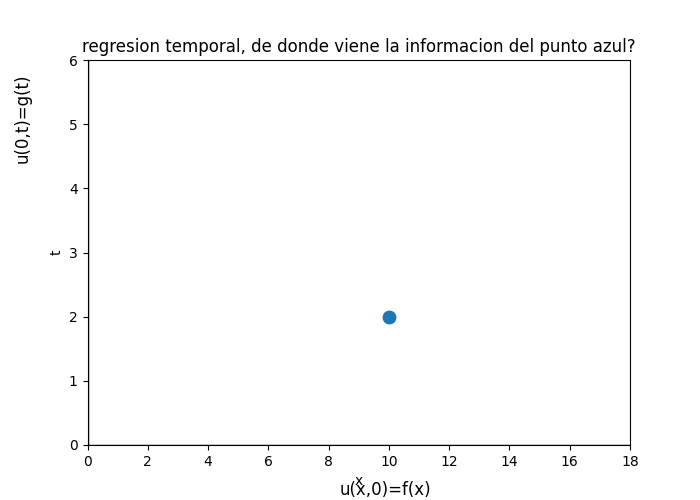

In [9]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image, display

# limites y punto inicial (xi>=0 para pegar t=0)
x_max, t_max = 18, 6
x0, t0 = 10.0, 2.0
xi = x0 - 4.0*t0

# tiempos hacia atras
t_stop = 0.0
pasos = 40
pausa = 8
t_vals = np.linspace(t0, t_stop, pasos)
x_vals = 4.0*t_vals + xi

# figura
fig, ax = plt.subplots(figsize=(7, 5))
ax.set_xlim(0, x_max); ax.set_ylim(0, t_max)
ax.set_xlabel("x"); ax.set_ylabel("t")
ax.set_title("regresion temporal, de donde viene la informacion del punto azul?")
ax.plot([0, x_max], [0, 0], color='k', linewidth=1)
ax.plot([0, 0], [0, t_max], color='k', linewidth=1)
ax.annotate("u(0,t)=g(t)", xy=(0, t_max*0.85), xytext=(-40, 0),
            textcoords='offset points', ha='right', va='center',
            rotation=90, fontsize=12)
ax.annotate("u(x,0)=f(x)", xy=(x_max*0.55, 0), xytext=(0, -26),
            textcoords='offset points', ha='center', va='top', fontsize=12)

# punto fijo y bolita
fijo, = ax.plot([x0], [t0], marker='o', markersize=9, linestyle='')
bolita, = ax.plot([], [], marker='o', markersize=7, linestyle='')
linea, = ax.plot([], [], linestyle='--', linewidth=2)

def init():
    bolita.set_data([], []); linea.set_data([], [])
    return fijo, bolita, linea

def update(frame):
    if frame < pausa:
        bolita.set_data([], []); linea.set_data([], [])
        return fijo, bolita, linea
    k = min(frame - pausa, len(t_vals)-1)
    linea.set_data(x_vals[:k+1], t_vals[:k+1])
    bolita.set_data([x_vals[k]], [t_vals[k]])
    return fijo, bolita, linea

ani = FuncAnimation(fig, update, frames=pausa+len(t_vals),
                    init_func=init, interval=90, blit=True)

ani.save("bolita_choca_t.gif", writer="pillow", fps=10)
plt.close(fig)
display(Image("bolita_choca_t.gif"))


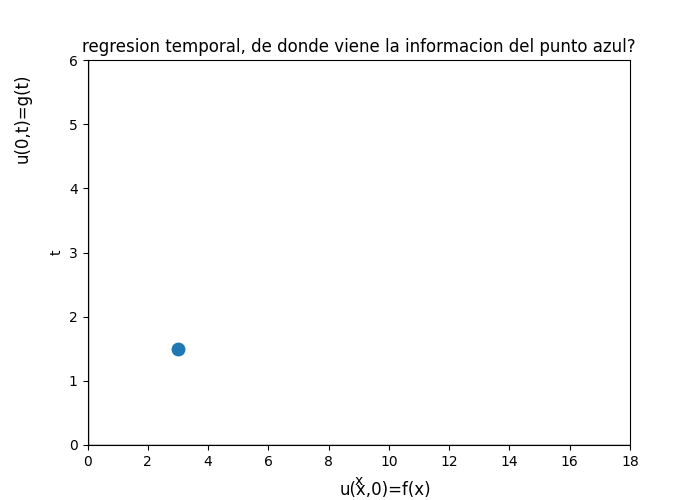

In [10]:
# genera y muestra un gif de la bolita que baja hasta x=0
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image, display

# limites y punto inicial (xi<0 para pegar x=0)
x_max, t_max = 18, 6
x0, t0 = 3.0, 1.5
xi = x0 - 4.0*t0
t_stop = -xi/4.0

# tiempos hacia atras
pasos = 40
pausa = 8
t_vals = np.linspace(t0, t_stop, pasos)
x_vals = 4.0*t_vals + xi

# figura
fig, ax = plt.subplots(figsize=(7, 5))
ax.set_xlim(0, x_max); ax.set_ylim(0, t_max)
ax.set_xlabel("x"); ax.set_ylabel("t")
ax.set_title("regresion temporal, de donde viene la informacion del punto azul?")
ax.plot([0, x_max], [0, 0], color='k', linewidth=1)
ax.plot([0, 0], [0, t_max], color='k', linewidth=1)
ax.annotate("u(0,t)=g(t)", xy=(0, t_max*0.85), xytext=(-40, 0),
            textcoords='offset points', ha='right', va='center',
            rotation=90, fontsize=12)
ax.annotate("u(x,0)=f(x)", xy=(x_max*0.55, 0), xytext=(0, -26),
            textcoords='offset points', ha='center', va='top', fontsize=12)

# punto fijo y bolita
fijo, = ax.plot([x0], [t0], marker='o', markersize=9, linestyle='')
bolita, = ax.plot([], [], marker='o', markersize=7, linestyle='')
linea, = ax.plot([], [], linestyle='--', linewidth=2)

def init():
    bolita.set_data([], []); linea.set_data([], [])
    return fijo, bolita, linea

def update(frame):
    if frame < pausa:
        bolita.set_data([], []); linea.set_data([], [])
        return fijo, bolita, linea
    k = min(frame - pausa, len(t_vals)-1)
    linea.set_data(x_vals[:k+1], t_vals[:k+1])
    bolita.set_data([x_vals[k]], [t_vals[k]])
    return fijo, bolita, linea

ani = FuncAnimation(fig, update, frames=pausa+len(t_vals),
                    init_func=init, interval=90, blit=True)

ani.save("bolita_choca_x.gif", writer="pillow", fps=10)
plt.close(fig)
display(Image("bolita_choca_x.gif"))



El meollo del asunto aqui es comparar **cuánto hay que retroceder en tiempo $t$** para llegar a $t = 0$ vs. **cuánto hay que retroceder en $x$** para llegar a $x = 0$. dado un punto en el espacio. 
---

#### 1. Para llegar a $t = 0$:

- **Ecuación de característica:**
 ni modo, el que llegue hasta aca ya tendra la ecuacion de la caracteristica para esta PDE, tomenla como un regalo
  $$
  x = 4t + \xi.
  $$

- En $(x, t)$, retroceder a $t = 0$: sustituyendo $t = 0$,

  $$
  x_{\text{en } t=0} = \xi = x - 4t.
  $$

- Si $\xi \geq 0$, llegas a $x \geq 0$ en el eje $t = 0$.

---

#### 2. Para llegar a $x = 0$:

- Resolver $x = 0$:

  $$
  0 = 4t + \xi \quad \Rightarrow \quad t = -\xi/4.
  $$

- Si $\xi < 0$, este tiempo es positivo, así que pegas primero el eje vertical.

---

#### En resumen:

- Si $\xi = x - 4t \geq 0$, **primero llegas al eje $t = 0$** → usas $f(x)$.
- Si $\xi < 0$, **primero llegas al eje $x = 0$** → usas $g(t)$. 
- Este analisis ya nos mostro donde es la separacion y por tanto ya se puede analizar por casos la solucion. 
